In [451]:
import random as r
import pandas as pd
import numpy as np


n_samples = 10000


chars = '1234567890abcdefghijk'
user_id_len = 15
user_ids = set()
while len(user_ids) < n_samples:
    s = ''.join(r.choices(chars, k=user_id_len))
    user_ids.add(s)


max_order_num = 9
order_nums = []
for _ in range(1, n_samples + 1):
    order_nums.append(r.randint(1, max_order_num))


mean = 1440
std = 200
delivery_times = np.round(np.random.normal(mean, std, n_samples), 10)



lambda_ = 1
shift = 1
total_sums = np.round(np.random.exponential(lambda_, n_samples) + shift, 3)


retention_probabilities = [0.35, 0.25, 0.2, 0.15, 0.05]
retention_numbers = [1, 2, 3, 4, 5]
retentions = np.random.choice(retention_numbers, n_samples, p=retention_probabilities)


data = pd.DataFrame({
    'user_id': list(user_ids),
    'order_num': order_nums,
    'delivery_time': delivery_times,
    'total_sum': total_sums,
    'retention': retentions
    })

data

,user_id,order_num,delivery_time,total_sum,retention
0,i29bd05h127f2db,2,1554.444823,1.978,4
1,156324ifhi6g2a3,5,1368.429338,3.899,3
2,e2h89ab0i2dc9h0,9,1174.691276,1.672,2
3,41dec9gggg1i569,9,1243.365398,1.743,4
4,chc431dgb0f5bk6,9,1596.273493,4.407,2
...,...,...,...,...,...
9995,5c00if60ahdc0e4,8,1341.733871,1.678,3
9996,dfd3bg498229f57,3,1799.530270,2.838,2
9997,5efc976h9g64gf0,6,1612.955085,1.078,3
9998,5gj14a35i576jh3,3,1153.603736,1.854,2


In [452]:
mean_delivery_time_data = pd.DataFrame({'mean_delivery_time': np.round(data.groupby('order_num')['delivery_time'].mean())})
merged_data = pd.merge(data, mean_delivery_time_data, on='order_num')
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time
0,i29bd05h127f2db,2,1554.444823,1.978,4,1443.0
1,156324ifhi6g2a3,5,1368.429338,3.899,3,1439.0
2,e2h89ab0i2dc9h0,9,1174.691276,1.672,2,1438.0
3,41dec9gggg1i569,9,1243.365398,1.743,4,1438.0
4,chc431dgb0f5bk6,9,1596.273493,4.407,2,1438.0
...,...,...,...,...,...,...
9995,5c00if60ahdc0e4,8,1341.733871,1.678,3,1435.0
9996,dfd3bg498229f57,3,1799.530270,2.838,2,1447.0
9997,5efc976h9g64gf0,6,1612.955085,1.078,3,1445.0
9998,5gj14a35i576jh3,3,1153.603736,1.854,2,1447.0


In [453]:
n_in_every_segment = 3
num_segments = (max_order_num + n_in_every_segment - 1) // n_in_every_segment
bins = [i * n_in_every_segment for i in range(num_segments + 1)]
labels = [f'{i * n_in_every_segment + 1}-{(i + 1) * n_in_every_segment}' for i in range(num_segments)]

merged_data['segment'] = pd.cut(merged_data['order_num'], bins=bins, labels=labels)
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment
0,i29bd05h127f2db,2,1554.444823,1.978,4,1443.0,1-3
1,156324ifhi6g2a3,5,1368.429338,3.899,3,1439.0,4-6
2,e2h89ab0i2dc9h0,9,1174.691276,1.672,2,1438.0,7-9
3,41dec9gggg1i569,9,1243.365398,1.743,4,1438.0,7-9
4,chc431dgb0f5bk6,9,1596.273493,4.407,2,1438.0,7-9
...,...,...,...,...,...,...,...
9995,5c00if60ahdc0e4,8,1341.733871,1.678,3,1435.0,7-9
9996,dfd3bg498229f57,3,1799.530270,2.838,2,1447.0,1-3
9997,5efc976h9g64gf0,6,1612.955085,1.078,3,1445.0,4-6
9998,5gj14a35i576jh3,3,1153.603736,1.854,2,1447.0,1-3


In [454]:
total_sum_desc = pd.DataFrame(merged_data['total_sum'].describe()).T
total_sum_desc

,count,mean,std,min,25%,50%,75%,max
total_sum,10000.0,1.981692,1.001279,1.0,1.274,1.666,2.36225,9.96


In [455]:
most_frequent_total_sum = merged_data['total_sum'].value_counts()


print(f'Медиана: {total_sum_desc["50%"].values[0]}')
print(f'Мода: {most_frequent_total_sum.index[0]}; встречается {most_frequent_total_sum.iloc[0]} раз')
print(f'Среднее: {total_sum_desc["mean"].values[0]}')
print(f'Дисперсия: {np.var(merged_data["total_sum"])}')
print(f'Стандартное отклонение: {total_sum_desc["std"].values[0]}')

Медиана: 1.666
Мода: 1.038; встречается 19 раз
Среднее: 1.9816918
Дисперсия: 1.00245991961276
Стандартное отклонение: 1.001279269549871


In [456]:
import matplotlib.pyplot as plt
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment
0,i29bd05h127f2db,2,1554.444823,1.978,4,1443.0,1-3
1,156324ifhi6g2a3,5,1368.429338,3.899,3,1439.0,4-6
2,e2h89ab0i2dc9h0,9,1174.691276,1.672,2,1438.0,7-9
3,41dec9gggg1i569,9,1243.365398,1.743,4,1438.0,7-9
4,chc431dgb0f5bk6,9,1596.273493,4.407,2,1438.0,7-9
...,...,...,...,...,...,...,...
9995,5c00if60ahdc0e4,8,1341.733871,1.678,3,1435.0,7-9
9996,dfd3bg498229f57,3,1799.530270,2.838,2,1447.0,1-3
9997,5efc976h9g64gf0,6,1612.955085,1.078,3,1445.0,4-6
9998,5gj14a35i576jh3,3,1153.603736,1.854,2,1447.0,1-3


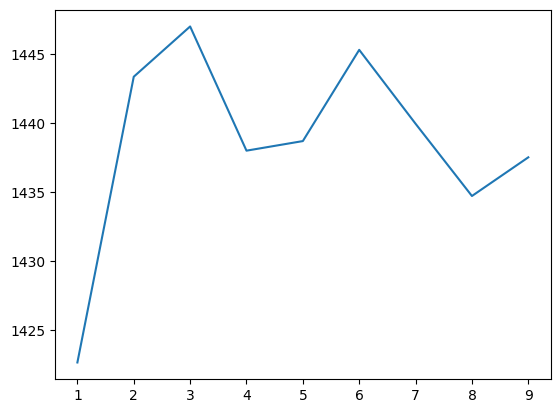

In [457]:
plt.plot(merged_data.groupby('order_num')['delivery_time'].mean())

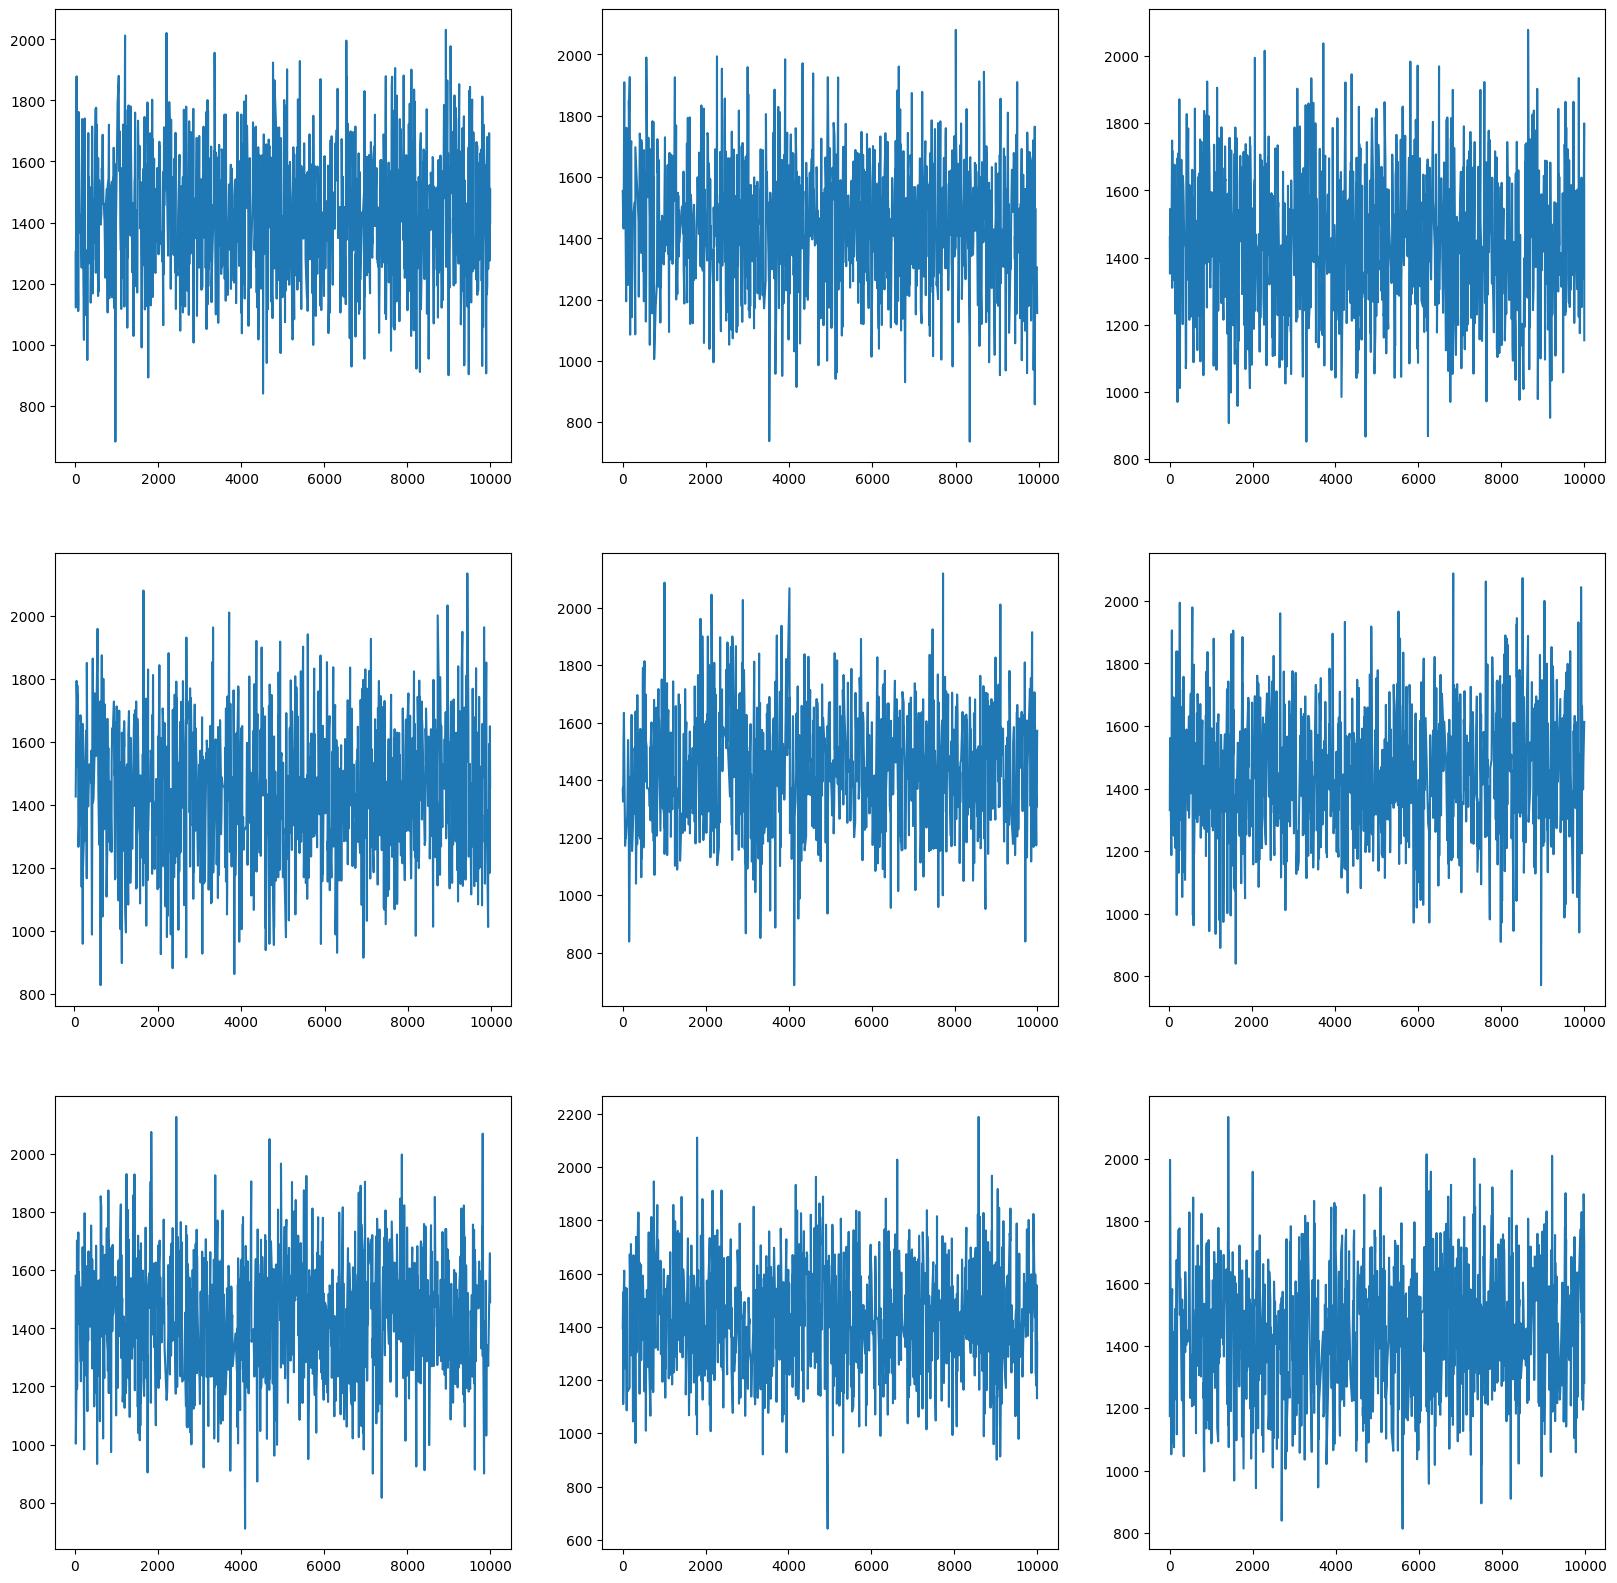

In [469]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
assert len(axs) * len(axs[0]) == max_order_num
curr_order_num = 0
for i in range(len(axs)):
    for j in range(len(axs[0])):
        pass